## Naive Bayes

[Naive Bayes classifiers](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.


Abstractly, naive Bayes is a conditional probability model given a problem instance to be classified, represented by a vector $\mathbf{x} = (x_1, \dots, x_n)$ representing some $n$ features (independent variables), it assigns to this instance probabilities

$$p(C_k \mid x_1, \dots, x_n)\,$$

for each of $k$ possible outcomes or classes $C_k$.

The problem with the above formulation is that if the number of features $n$ is large or if a feature can take on a large number of values, then basing such a model on probability tables is infeasible.  We therefore reformulate the model to make it more tractable.  Using Bayes' theorem, the conditional probability can be decomposed as

$$p(C_k \mid \mathbf{x}) = \frac{p(C_k) \ p(\mathbf{x} \mid C_k)}{p(\mathbf{x})} \,$$

In plain English, using Bayesian probability terminology, the above equation can be written as

$$\mbox{posterior} = \frac{\mbox{prior} \times \mbox{likelihood}}{\mbox{evidence}} \,$$

In practice, there is interest only in the numerator of that fraction, because the denominator does not depend on $C$ and the values of the features $F_i$ are given, so that the denominator is effectively constant.
The numerator is equivalent to the joint probability model

$$p(C_k, x_1, \dots, x_n)\,$$

which can be rewritten as follows, using the Chain rule for repeated applications of the definition of conditional probability

$$
\begin{align}
p(C_k, x_1, \dots, x_n) & = p(x_1, \dots, x_n, C_k) \\
                        & = p(x_1 \mid x_2, \dots, x_n, C_k) p(x_2, \dots, x_n, C_k) \\
                        & = p(x_1 \mid x_2, \dots, x_n, C_k) p(x_2 \mid x_3, \dots, x_n, C_k) p(x_3, \dots, x_n, C_k) \\
                        & = \dots \\
                        & = p(x_1 \mid x_2, \dots, x_n, C_k) p(x_2 \mid x_3, \dots, x_n, C_k) \dots   p(x_{n-1} \mid x_n, C_k) p(x_n \mid C_k) p(C_k)  \\
\end{align}
$$

Now the "naive" conditional independence assumptions come into play assume that each feature $F_i$ is conditionally statistical independence|independent of every other feature $F_j$ for $j\neq i$, given the category $C$.  This means that

$$p(x_i \mid x_{i+1}, \dots ,x_{n}, C_k ) = p(x_i \mid C_k)\,$$.

Thus, the joint model can be expressed as

$$
\begin{align}
p(C_k \mid x_1, \dots, x_n) & \varpropto p(C_k, x_1, \dots, x_n) \\
                            & \varpropto p(C_k) \ p(x_1 \mid C_k) \ p(x_2\mid C_k) \ p(x_3\mid C_k) \ \cdots \\
                            & \varpropto p(C_k) \prod_{i=1}^n p(x_i \mid C_k)\,.
\end{align}
$$

This means that under the above independence assumptions, the conditional distribution over the class variable $C$ is

$$p(C_k \mid x_1, \dots, x_n) = \frac{1}{Z} p(C_k) \prod_{i=1}^n p(x_i \mid C_k)$$

where the evidence $Z = p(\mathbf{x})$ is a scaling factor dependent only on $x_1, \dots, x_n$, that is, a constant if the values of the feature variables are known.

### Constructing a classifier from the probability model   

The discussion so far has derived the independent feature model, that is, the naive Bayes probability model.  The naive Bayes classifier combines this model with a decision rule.  One common rule is to pick the hypothesis that is most probable; this is known as the 'maximum a posteriori' or 'MAP' decision rule.  The corresponding classifier, a Bayes classifier, is the function that assigns a class label $\hat{y} = C_k$ for some $k$ as follows

$$\hat{y} = \underset{k \in \{1, \dots, K\}}{\operatorname{argmax}} \ p(C_k) \displaystyle\prod_{i=1}^n p(x_i \mid C_k).$$

## Gaussian naive Bayes

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Normal distribution. For example, suppose the training data contains a continuous attribute, $x$. We first segment the data by the class, and then compute the mean and variance of $x$ in each class. Let $\mu_c$ be the mean of the values in $x$ associated with class c, and let $\sigma^2_c$ be the variance of the values in $x$ associated with class c. Suppose we have collected some observation value $v$. Then, the probability distribution of $v$ given a class $c$, $p(x=v \mid c)$, can be computed by plugging $v$ into the equation for a Normal distribution parameterized by $\mu_c$ and $\sigma^2_c$. That is,

$$
p(x=v \mid c)=\frac{1}{\sqrt{2\pi\sigma^2_c}}\,e^{ -\frac{(v-\mu_c)^2}{2\sigma^2_c} }
$$

Another common technique for handling continuous values is to use binning  the feature values, to obtain a new set of Bernoulli-distributed features; some literature in fact suggests that this is necessary to apply naive Bayes, but it is not, and the discretization may throw away discriminative information.


## Multinomial Naive Bayes 

In probability theory, the multinomial distribution is a generalization of the binomial distribution. For example, it models the probability of counts for rolling a k-sided dice n times. For n independent trials each of which leads to a success for exactly one of $k$ categories, with each category having a given fixed success probability, the multinomial distribution gives the probability of any particular combination of numbers of successes for the various categories.

With a multinomial event model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial $(p_1, \dots, p_n)$ where $p_i$ is the probability that event $i$ occurs $K$ such multinomials in the multiclass case). A feature vector $\mathbf{x} = (x_1, \dots, x_n)$ is then a histogram, with $x_i$ counting the number of times event $i$ was observed in a particular instance. This is the event model typically used for document classification, with events representing the occurrence of a word in a single document (see bag of words assumption). The likelihood of observing a histogram $x$ is given by

$$
p(\mathbf{x} \mid C_k) = \frac{(\sum_i x_i)!}{\prod_i x_i !} \prod_i {p_{ki}}^{x_i}
$$

The multinomial naive Bayes classifier becomes a linear classifier when expressed in log-space

$$
\begin{align}
\log p(C_k \mid \mathbf{x}) & \varpropto \log \left( p(C_k) \prod_{i=1}^n {p_{ki}}^{x_i} \right) \\
 & = \log p(C_k) + \sum_{i=1}^n x_i \cdot \log p_{ki} \\
 & = b + \mathbf{w}_k^\top \mathbf{x}
\end{align}
$$

where $b = \log p(C_k)$ and $w_{ki} = \log p_{ki}$.

If a given class and feature value never occur together in the training data, then the frequency-based probability estimate will be zero. This is problematic because it will wipe out all information in the other probabilities when they are multiplied. Therefore, it is often desirable to incorporate a small-sample correction, called pseudocount, in all probability estimates such that no probability is ever set to be exactly zero. This way of regularizing naive Bayes is called Laplace smoothing when the pseudocount is one, and Lidstone smoothing in the general case.

Rennie et al. discuss problems with the multinomial assumption in the context of document classification and possible ways to alleviate those problems, including the use of tf–idf weights instead of raw term frequencies and document length normalization, to produce a naive Bayes classifier that is competitive with support vector machines.


## Bernoulli naive Bayes

In probability theory and statistics, the Bernoulli distribution, named after Swiss scientist Jacob Bernoulli, is the probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q=1-p$ —i.e., the probability distribution of any single experiment that asks a yes–no question; the question results in a boolean-valued function, a single bit of information whose value is success/yes/true/one with probability p and failure/no/false/zero with probability q. It can be used to represent a coin toss where 1 and 0 would represent "head" and "tail" (or vice versa), respectively. In particular, unfair coins would have $p \neq 0.5$. 

The Bernoulli distribution is a special case of the binomial distribution where a single experiment/trial is conducted (n=1). It is also a special case of the two-point distribution, for which the outcome need not be a bit, i.e., the two possible outcomes need not be 0 and 1.

In the multivariate Bernoulli event model, features are independent boolean data type describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence features are used rather than term frequencies. If $x_i$ is a boolean expressing the occurrence or absence of the $i$'th term from the vocabulary, then the likelihood of a document given a class $C_k$ is given by

$$
p(\mathbf{x} \mid C_k) = \prod_{i=1}^n p_{ki}^{x_i} (1 - p_{ki})^{(1-x_i)}
$$

where $p_{ki}$ is the probability of class $C_k$ generating the term $w_i$. This event model is especially popular for classifying short texts. It has the benefit of explicitly modelling the absence of terms. Note that a naive Bayes classifier with a Bernoulli event model is not the same as a multinomial NB classifier with frequency counts truncated to one.



## Bayesian Probability

In this lesson we will disucss Bayesian probability theory. There are no data sets, or libraires to be installed.

## Probability and Statistics

Probability is a measure of the likelihood of a random phenomenon or chance behavior.  Probability describes the long-term proportion with which a certain outcome will occur in situations with short-term uncertainty. 

### The Axioms of Probability


#### First axiom - The probability of an event is a non-negative real number:
$$
P(E)\in\mathbb{R}, P(E)\geq 0 \qquad \forall E\in F
$$
where $F$ is the event space

#### Second axiom -  unit measure:

The probability that some elementary event in the entire sample space will occur is 1.

$$
P(\Omega) = 1.
$$  

#### Third axiom - the assumption of $\sigma$-additivity:

Any countable sequence of disjoint (synonymous with mutually exclusive) events $E_1, E_2, ...$ satisfies

$$
P\left(\bigcup_{i = 1}^\infty E_i\right) = \sum_{i=1}^\infty P(E_i).
$$

The total probability of all possible event always sums to 1. 

### Consequences of these axioms

The probability of the empty set:
$$
P(\varnothing)=0.
$$

Monotonicity   
$$
\quad\text{if}\quad A\subseteq B\quad\text{then}\quad P(A)\leq P(B).
$$

The numeric bound between 0 and 1:  

$$
0\leq P(E)\leq 1\qquad \forall E\in F.
$$


![Probability is expressed in numbers between 0 and 1](http://nikbearbrown.com/YouTube/MachineLearning/M10/Probability_0_1.png)    
*Probability is expressed in numbers between 0 and 1.*   


Probabilty of a certain event is 1:

$$
P(True) = 1
$$

Probability = 1 means it always happens.


Probabilty of an impossible event is 0:

$$
P(False) = 0
$$

Probability = 0 means the event never happens.  

Probabilty of A or B:

$$
P(A \quad or \quad B) = P(A) + P(A) - P(A \quad and \quad B) 
$$

or

$$
P(A \cup B) = P(A) + P(A) - P(A \cap B) 
$$


Probabilty of not A:

$$
P(not  \quad A) = 1- P(A) 
$$


## Conditional Probability

In probability theory, a [conditional probability](https://en.wikipedia.org/wiki/Conditional_probability) measures the probability of an event given that another event has occurred. That is,  "the conditional probability of A given B."   

 the conditional probability of A given B is defined as the quotient of the probability of the joint of events A and B, and the probability of B:
 
$$ 
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

This may be visualized using a Venn diagram. 

![P(A and B) Venn](http://nikbearbrown.com/YouTube/MachineLearning/M10/Conditional_Probability_Venn_Diagram.png)     
*$P(A \cap B)$*

### Corollary of Conditional Probability is The Chain Rule

If we multiply both sides by $P(B)$ then

$$ 
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

becomes

$$ 
P(A|B) P(B) = P(A \cap B) 
$$





### Statistical independence

Events A and B are defined to be statistically independent if:

$$
\begin{align}
             P(A \cap B) &= P(A) P(B) \\
  \Leftrightarrow P(A|B) &= P(A) \\
  \Leftrightarrow P(B|A) &= P(B)
\end{align}
$$

That is, the occurrence of A does not affect the probability of B, and vice versa


Probabilty of A or B for independent events $P(A and B) is 0$:

$$
P(A or B) = P(A) + P(A) 
$$

## Bayes Rule

[Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) (alternatively Bayes' law or Bayes' rule) describes the probability of an event, given prior events. That is, a conditional probability.

$$
P(A|B) = \frac{P(A)\, P(B | A)}{P(B)},
$$

where A and B are events.

* P(A) and P(B) are the independent probabilities of A and B.  
* P(A | B), a conditional probability, is the probability of observing event A given that B is true.  
* P(B | A), is the probability of observing event B given that A is true.  


## Bayesian inference

[Bayesian inference](https://en.wikipedia.org/wiki/Bayesian_inference) is a method of statistical inference in which Bayes' theorem is used to update the probability for a hypothesis as evidence. Bayesian inference derives the posterior probability as a consequence of two antecedents, a prior probability and a "likelihood function" derived from a statistical model for the observed data. 

Bayesian inference computes the posterior probability according to Bayes' theorem:

$$
P(H\mid E) = \frac{P(E\mid H) \cdot P(H)}{P(E)}
$$

where,    

$P(H\mid E)$ the posterior probability, denotes a conditional probability of $\textstyle H$ (the hypothesis) whose probability may be affected by the evidence $\textstyle E$.   

$\textstyle P(H)$, the prior probability, is an estimate of the probability that a hypothesis is true, before observing the current evidence.   

$\textstyle P(E\mid H)$ is the probability of observing $\textstyle E$ given $\textstyle H$. It indicates the compatibility of the evidence with the given hypothesis.   

$\textstyle P(E)$ is sometimes termed the marginal likelihood or "model evidence". This factor is the same for all possible hypotheses being considered. 

Note that Bayes' rule can also be written as follows:
$$
P(H\mid E) = \frac{P(E\mid H)}{P(E)} \cdot P(H)
$$
where the factor $\textstyle \frac{P(E\mid H)}{P(E)}$ represents the impact of $E$ on the probability of $H$.   

## Bayesian probability example

Suppose a certain disease has an incidence rate of 0.01% (that is, it afflicts 0.01% of the population).  A test has been devised to detect this disease.  The test does not produce false negatives (that is, anyone who has the disease will test positive for it), but the false positive rate is 1% (that is, about 1% of people who take the test will test positive, even though they do not have the disease).  Suppose a randomly selected person takes the test and tests positive.  What is the probability that this person actually has the disease?

Bayes theorem would ask the question, what is the probability of disease given a postive result, or $P(disease\mid positive))$. 

What do we know?  

$P(positive\mid disease)=1$ (i.e. The test does not produce false negatives.)     
$P(disease)=0.0001$ (i.e.  1/10,000 have the disease)      
$P(positive\mid no disease)=0.01$ (i.e. he false positive rate is 1%. This means 1% of people who take the test will test positive, even though they do not have the disease)      

Bayes’ Theorem

$$
P(A|B) = \frac{P(A)\, P(B | A)}{P(B)},
$$

which can be rewritten as  

$$
P(A|B) = \frac{P(A)\, P(B | A)}{P(A)P(B|A)+P(\bar{A})P(B|\bar{A})},
$$

which in our example is
$$
P(disease|positive) = \frac{P(disease)\, P(positive | disease)}{P(disease)P(positive|disease)+P(no \quad  disease)P(positive|no \quad disease)},
$$

plugging in the numbers gives

$$
P(disease|positive)= \frac{(0.0001)\, (1)}{(0.0001)(1)+(0.9999)(0.01)}, \approx 0.01
$$

So even though the test is 99% accurate, of all people who test positive, over 99% do not have the disease.  


# Bayesians versus Frequentists

 
[Frequentist inference](https://en.wikipedia.org/wiki/Frequentist_inference) or frequentist statistics is a scheme for making statistical inference based on the frequency or proportion of the data. This effectively requires that conclusions should only be drawn with a set of repetitions.    

Frequentists will only generate statistical inference given a large enough set of repetitions. In contrast, a Bayesian approach to inference does allow probabilities to be associated with unknown parameters.   

![Count Von Count](http://nikbearbrown.com/YouTube/MachineLearning/M10/Count_von_Count_kneeling.png)   
*Count Von Count*   
- from https://en.wikipedia.org/wiki/File:Count_von_Count_kneeling.png  

While "probabilities" are involved in both approaches to inference, frequentist probability is essentially equivelent to counting. The Bayesian approach allows these estimates of probabilities to be based upon counting but also allows for subjective estimates (i.e. guesses) of prior probabilities.

Bayesian probability, also called evidential probability, or subjectivist probability, can be assigned to any statement whatsoever, even when no random process is involved. Evidential probabilities are considered to be degrees of belief, and a Bayesian can even use an un-informative prior (also called a non-informative or Jeffreys prior).

In Bayesian probability, the [Jeffreys prior](https://en.wikipedia.org/wiki/Jeffreys_prior), named after Sir Harold Jeffreys, is a non-informative (objective) prior distribution for a parameter space.  The crucial idea behind the Jeffreys prior is the Jeffreys posterior. This posterior aims to reflect as best as possible the information about the parameters brought by the data, in effect  "representing ignorance" about the prior. This is sometimes called the "principle of indifference." Jeffreys prior is proportional to the square root of the determinant of the Fisher information:

$$
p\left(\vec\theta\right) \propto \sqrt{\det \mathcal{I}\left(\vec\theta\right)}.\,
$$

It has the key feature that it is invariant under reparameterization of the parameter vector $\vec\theta.$  

At its essence the Bayesian can be vague or subjective about an inital guess at a prior probability. and the the posterior probability be updated data point by data point. A Bayesian defines a "probability" in the same way that many non-statisticians do - namely an indication of the plausibility or belief of a proposition.

A Frequentist is someone that believes probabilities represent long run frequencies with which events occur; he or she will have a model (e.g. Guassian, uniform, etc.) of how the sample popluation was generated. The observed counts are considered a random sample the estimate the true parameters of the model.   

It is important to note that most Frequentist methods have a Bayesian equivalent (that is, they give the same results) when there are enough repeated trails. That is, they converge the the same result given enough data.  



## Applying Bayes' theorem to iris classification

Can **Bayes' theorem** help us to solve a **classification problem**, namely predicting the species of an iris?

In [1]:
from __future__ import print_function
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')

/Users/bear/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# apply the ceiling function to the numeric columns
iris.loc[:, 'sepal_length':'petal_width'] = iris.loc[:, 'sepal_length':'petal_width'].apply(np.ceil)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.0,4.0,2.0,1.0,setosa
1,5.0,3.0,2.0,1.0,setosa
2,5.0,4.0,2.0,1.0,setosa
3,5.0,4.0,2.0,1.0,setosa
4,5.0,4.0,2.0,1.0,setosa


## Deciding how to make a prediction

Let's say that I have an **out-of-sample iris** with the following measurements: **7, 3, 5, 2**. How might I predict the species?

In [4]:
# show all observations with features: 7, 3, 5, 2
iris[(iris.sepal_length==7) & (iris.sepal_width==3) & (iris.petal_length==5) & (iris.petal_width==2)]

,sepal_length,sepal_width,petal_length,petal_width,species
54,7.0,3.0,5.0,2.0,versicolor
58,7.0,3.0,5.0,2.0,versicolor
63,7.0,3.0,5.0,2.0,versicolor
68,7.0,3.0,5.0,2.0,versicolor
72,7.0,3.0,5.0,2.0,versicolor
73,7.0,3.0,5.0,2.0,versicolor
74,7.0,3.0,5.0,2.0,versicolor
75,7.0,3.0,5.0,2.0,versicolor
76,7.0,3.0,5.0,2.0,versicolor
77,7.0,3.0,5.0,2.0,versicolor


In [5]:
# count the species for these observations
iris[(iris.sepal_length==7) & (iris.sepal_width==3) & (iris.petal_length==5) & (iris.petal_width==2)].species.value_counts()

versicolor    13
virginica      4
Name: species, dtype: int64

In [6]:
# count the species for all observations
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Let's frame this as a **conditional probability problem**: What is the probability of some particular species, given the measurements 7, 3, 5, and 2?

$$P(species \ | \ 7352)$$

We could calculate the conditional probability for **each of the three species**, and then predict the species with the **highest probability**:

$$P(setosa \ | \ 7352)$$
$$P(versicolor \ | \ 7352)$$
$$P(virginica \ | \ 7352)$$

## Calculating the probability of each species

**Bayes' theorem** gives us a way to calculate these conditional probabilities.

Let's start with **versicolor**:

$$P(versicolor \ | \ 7352) = \frac {P(7352 \ | \ versicolor) \times P(versicolor)} {P(7352)}$$

We can calculate each of the terms on the right side of the equation:

$$P(7352 \ | \ versicolor) = \frac {13} {50} = 0.26$$

$$P(versicolor) = \frac {50} {150} = 0.33$$

$$P(7352) = \frac {17} {150} = 0.11$$

Therefore, Bayes' theorem says the **probability of versicolor given these measurements** is:

$$P(versicolor \ | \ 7352) = \frac {0.26 \times 0.33} {0.11} = 0.76$$

Let's repeat this process for **virginica** and **setosa**:

$$P(virginica \ | \ 7352) = \frac {0.08 \times 0.33} {0.11} = 0.24$$

$$P(setosa \ | \ 7352) = \frac {0 \times 0.33} {0.11} = 0$$

We predict that the iris is a versicolor, since that species had the **highest conditional probability**.

### The intuition behind Bayes' theorem

1. We framed a **classification problem** as three conditional probability problems.
2. We used **Bayes' theorem** to calculate those conditional probabilities.
3. We made a **prediction** by choosing the species with the highest conditional probability.


Let's make some hypothetical adjustments to the data, to demonstrate how Bayes' theorem makes intuitive sense:

Pretend that **more of the existing versicolors had measurements of 7352:**

- $P(7352 \ | \ versicolor)$ would increase, thus increasing the numerator.
- It would make sense that given an iris with measurements of 7352, the probability of it being a versicolor would also increase.

Pretend that **most of the existing irises were versicolor:**

- $P(versicolor)$ would increase, thus increasing the numerator.
- It would make sense that the probability of any iris being a versicolor (regardless of measurements) would also increase.

Pretend that **17 of the setosas had measurements of 7352:**

- $P(7352)$ would double, thus doubling the denominator.
- It would make sense that given an iris with measurements of 7352, the probability of it being a versicolor would be cut in half.

## Applying Naive Bayes classification to spam filtering

Let's pretend we have an email with three words: "Send money now." We'll use Naive Bayes to classify it as **ham or spam.**

$$P(spam \ | \ \text{send money now}) = \frac {P(\text{send money now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

By assuming that the features (the words) are **conditionally independent**, we can simplify the likelihood function:

$$P(spam \ | \ \text{send money now}) \approx \frac {P(\text{send} \ | \ spam) \times P(\text{money} \ | \ spam) \times P(\text{now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

We can calculate all of the values in the numerator by examining a corpus of **spam email**:

$$P(spam \ | \ \text{send money now}) \approx \frac {0.2 \times 0.1 \times 0.1 \times 0.9} {P(\text{send money now})} = \frac {0.0018} {P(\text{send money now})}$$

We would repeat this process with a corpus of **ham email**:

$$P(ham \ | \ \text{send money now}) \approx \frac {0.05 \times 0.01 \times 0.1 \times 0.1} {P(\text{send money now})} = \frac {0.000005} {P(\text{send money now})}$$

All we care about is whether spam or ham has the **higher probability**, and so we predict that the email is **spam**.

### Key takeaways

- The **"naive" assumption** of Naive Bayes (that the features are conditionally independent) is critical to making these calculations simple.
- The **normalization constant** (the denominator) can be ignored since it's the same for all classes.
- The **prior probability** is much less relevant once you have a lot of features.

## Comparing Naive Bayes with other models

Advantages of Naive Bayes:

- Model training and prediction are very fast
- Somewhat interpretable
- No tuning is required
- Features don't need scaling
- Insensitive to irrelevant features (with enough observations)
- Performs better than logistic regression when the training set is very small

Disadvantages of Naive Bayes:

- Predicted probabilities are not well-calibrated
- Correlated features can be problematic (due to the independence assumption)
- Can't handle negative features (with Multinomial Naive Bayes)
- Has a higher "asymptotic error" than logistic regression









## Text Mining: Representing text as data

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
# start with a simple example
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [9]:
# learn the 'vocabulary' of the training data
vect = CountVectorizer()
vect.fit(simple_train)
vect.get_feature_names()

[u'cab', u'call', u'me', u'please', u'tonight', u'you']

In [10]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<type 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [11]:
# print the sparse matrix
print (simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [12]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [13]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> In this scheme, features and samples are defined as follows:

> - Each individual token occurrence frequency (normalized or not) is treated as a **feature**.
> - The vector of all the token frequencies for a given document is considered a multivariate **sample**.

> A **corpus of documents** can thus be represented by a matrix with **one row per document** and **one column per token** (e.g. word) occurring in the corpus.

> We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [14]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test = ["please don't call me"]
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [15]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


**Summary:**

- `vect.fit(train)` learns the vocabulary of the training data
- `vect.transform(train)` uses the fitted vocabulary to build a document-term matrix from the training data
- `vect.transform(test)` uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

## Text Mining: Reading SMS data

In [16]:
# read tab-separated SMS data file
url = 'https://raw.githubusercontent.com/ga-students/DAT-BOS-16/master/data/sms.tsv'
col_names = ['label', 'message']
sms = pd.read_table(url, sep='\t', header=None, names=col_names)
print (sms.shape)
print (sms.head())

(5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [17]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [18]:
# convert label to a numeric variable
sms['label'] = sms.label.map({'ham':0, 'spam':1})

In [19]:
# define X and y
X = sms.message
y = sms.label

In [20]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (X_test.shape)

(4179,)
(1393,)


In [21]:
# instantiate the vectorizer
vect = CountVectorizer()

In [22]:
# learn training data vocabulary, then create document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<type 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [23]:
# alternative: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<type 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [24]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<type 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

## Text Mining: Examining the tokens and their counts

In [25]:
# store token names
X_train_tokens = vect.get_feature_names()

In [26]:
# first 50 tokens
print (X_train_tokens[:50])

[u'00', u'000', u'008704050406', u'0121', u'01223585236', u'01223585334', u'0125698789', u'02', u'0207', u'02072069400', u'02073162414', u'02085076972', u'021', u'03', u'04', u'0430', u'05', u'050703', u'0578', u'06', u'07', u'07008009200', u'07090201529', u'07090298926', u'07123456789', u'07732584351', u'07734396839', u'07742676969', u'0776xxxxxxx', u'07781482378', u'07786200117', u'078', u'07801543489', u'07808', u'07808247860', u'07808726822', u'07815296484', u'07821230901', u'07880867867', u'0789xxxxxxx', u'07946746291', u'0796xxxxxx', u'07973788240', u'07xxxxxxxxx', u'08', u'0800', u'08000407165', u'08000776320', u'08000839402', u'08000930705']


In [27]:
# last 50 tokens
print (X_train_tokens[-50:])

[u'yer', u'yes', u'yest', u'yesterday', u'yet', u'yetunde', u'yijue', u'ym', u'ymca', u'yo', u'yoga', u'yogasana', u'yor', u'yorge', u'you', u'youdoing', u'youi', u'youphone', u'your', u'youre', u'yourjob', u'yours', u'yourself', u'youwanna', u'yowifes', u'yoyyooo', u'yr', u'yrs', u'ything', u'yummmm', u'yummy', u'yun', u'yunny', u'yuo', u'yuou', u'yup', u'zac', u'zaher', u'zealand', u'zebra', u'zed', u'zeros', u'zhong', u'zindgi', u'zoe', u'zoom', u'zouk', u'zyada', u'\xe8n', u'\u3028ud']


In [28]:
# view X_train_dtm as a dense matrix
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
X_train_counts = np.sum(X_train_dtm.toarray(), axis=0)
X_train_counts

array([ 5, 23,  2, ...,  1,  1,  1])

In [30]:
X_train_counts.shape

(7456,)

In [31]:
# create a DataFrame of tokens with their counts
pd.DataFrame({'token':X_train_tokens, 'count':X_train_counts}).sort('count')

,count,token
3727,1,jules
4172,1,mallika
4169,1,malarky
4165,1,makiing
4161,1,maintaining
4158,1,mails
4157,1,mailed
4151,1,magicalsongs
4150,1,maggi
4149,1,magazine


## Text Mining: Calculating the "spamminess" of each token

In [32]:
# create separate DataFrames for ham and spam
sms_ham = sms[sms.label==0]
sms_spam = sms[sms.label==1]

In [33]:
# learn the vocabulary of ALL messages and save it
vect.fit(sms.message)
all_tokens = vect.get_feature_names()

In [34]:
# create document-term matrices for ham and spam
ham_dtm = vect.transform(sms_ham.message)
spam_dtm = vect.transform(sms_spam.message)

In [35]:
# count how many times EACH token appears across ALL ham messages
ham_counts = np.sum(ham_dtm.toarray(), axis=0)

In [36]:
# count how many times EACH token appears across ALL spam messages
spam_counts = np.sum(spam_dtm.toarray(), axis=0)

In [37]:
# create a DataFrame of tokens with their separate ham and spam counts
token_counts = pd.DataFrame({'token':all_tokens, 'ham':ham_counts, 'spam':spam_counts})

In [38]:
# add one to ham and spam counts to avoid dividing by zero (in the step that follows)
token_counts['ham'] = token_counts.ham + 1
token_counts['spam'] = token_counts.spam + 1

In [39]:
# calculate ratio of spam-to-ham for each token
token_counts['spam_ratio'] = token_counts.spam / token_counts.ham
token_counts.sort('spam_ratio')

,ham,spam,token,spam_ratio
3684,319,1,gt,0.003135
4793,317,1,lt,0.003155
3805,232,1,he,0.004310
6843,168,1,she,0.005952
4747,163,1,lor,0.006135
2428,151,1,da,0.006623
4550,136,1,later,0.007353
1247,90,1,ask,0.011111
6626,90,1,said,0.011111
2714,89,1,doing,0.011236


## Building a Naive Bayes model

We will use [Multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [40]:
# train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
NBm=nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [42]:
# calculate accuracy of class predictions
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.988513998564


In [43]:
# confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[1203    5]
 [  11  174]]


In [44]:
# predict (poorly calibrated) probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([  2.87744864e-03,   1.83488846e-05,   2.07301295e-03, ...,
         1.09026171e-06,   1.00000000e+00,   3.98279868e-09])

In [45]:
# calculate AUC
print (metrics.roc_auc_score(y_test, y_pred_prob))

0.986643100054


In [46]:
# print message text for the false positives
X_test[y_test < y_pred_class]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [47]:
# print message text for the false negatives
X_test[y_test > y_pred_class]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [48]:
# what do you notice about the false negatives?
X_test[3132]

"LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323."

## Comparing Naive Bayes with logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [50]:
# class predictions and predicted probabilities
y_pred_class = logreg.predict(X_test_dtm)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]

In [51]:
# calculate accuracy and AUC
print (metrics.accuracy_score(y_test, y_pred_class))
print (metrics.roc_auc_score(y_test, y_pred_prob))

0.989231873654
0.993189547163


In [52]:
# read yelp.csv into a DataFrame
url = 'https://raw.githubusercontent.com/ga-students/DAT-BOS-16/master/data/yelp.csv'
yelp = pd.read_csv(url)

# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Text Mining: Tokenization
- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [53]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [54]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(3064, 16825)

In [55]:
# last 50 features
print (vect.get_feature_names()[-50:])

[u'yyyyy', u'z11', u'za', u'zabba', u'zach', u'zam', u'zanella', u'zankou', u'zappos', u'zatsiki', u'zen', u'zero', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zihuatenejo', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zippers', u'zipps', u'ziti', u'zoe', u'zombi', u'zombies', u'zone', u'zones', u'zoning', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


In [56]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [57]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 20838)

In [58]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 169847)

In [59]:
# last 50 features
print (vect.get_feature_names()[-50:])

[u'zone out', u'zone when', u'zones', u'zones dolls', u'zoning', u'zoning issues', u'zoo', u'zoo and', u'zoo is', u'zoo not', u'zoo the', u'zoo ve', u'zoyo', u'zoyo for', u'zucca', u'zucca appetizer', u'zucchini', u'zucchini and', u'zucchini bread', u'zucchini broccoli', u'zucchini carrots', u'zucchini fries', u'zucchini pieces', u'zucchini strips', u'zucchini veal', u'zucchini very', u'zucchini with', u'zuchinni', u'zuchinni again', u'zuchinni the', u'zumba', u'zumba class', u'zumba or', u'zumba yogalates', u'zupa', u'zupa flavors', u'zuzu', u'zuzu in', u'zuzu is', u'zuzu the', u'zwiebel', u'zwiebel kr\xe4uter', u'zzed', u'zzed in', u'\xe9clairs', u'\xe9clairs napoleons', u'\xe9cole', u'\xe9cole len\xf4tre', u'\xe9m', u'\xe9m all']


In [60]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class))

0.918786692759


In [61]:
# calculate null accuracy
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.81996086105675148

In [62]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print ('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [63]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  169847
Accuracy:  0.854207436399


## Text Mining: Stopword Removal

- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [64]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

In [65]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  16528
Accuracy:  0.915851272016


In [66]:
# set of stop words
print (vect.get_stop_words())

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'nei

## Text Mining: Other CountVectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.


In [67]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Accuracy:  0.869863013699


In [68]:
# all 100 features
print (vect.get_feature_names())

[u'amazing', u'area', u'atmosphere', u'awesome', u'bad', u'bar', u'best', u'better', u'big', u'came', u'cheese', u'chicken', u'clean', u'coffee', u'come', u'day', u'definitely', u'delicious', u'did', u'didn', u'dinner', u'don', u'eat', u'excellent', u'experience', u'favorite', u'feel', u'food', u'free', u'fresh', u'friendly', u'friends', u'going', u'good', u'got', u'great', u'happy', u'home', u'hot', u'hour', u'just', u'know', u'like', u'little', u'll', u'location', u'long', u'looking', u'lot', u'love', u'lunch', u'make', u'meal', u'menu', u'minutes', u'need', u'new', u'nice', u'night', u'order', u'ordered', u'people', u'perfect', u'phoenix', u'pizza', u'place', u'pretty', u'prices', u'really', u'recommend', u'restaurant', u'right', u'said', u'salad', u'sandwich', u'sauce', u'say', u'service', u'staff', u'store', u'sure', u'table', u'thing', u'things', u'think', u'time', u'times', u'took', u'town', u'tried', u'try', u've', u'wait', u'want', u'way', u'went', u'wine', u'work', u'worth', 

In [69]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

Features:  100000
Accuracy:  0.885518590998


In [70]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  43957
Accuracy:  0.932485322896


## Text Mining: Introduction to TextBlob

TextBlob: "Simplified Text Processing"
    

In [71]:
# print the first review
print (yelp_best_worst.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [72]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.text[0])

In [73]:
# list the words
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [74]:
# list the sentences
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [75]:
# some string methods are available
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

## Text Mining: Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms


In [76]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# stem each word
print ([stemmer.stem(word) for word in review.words])

[u'my', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excel', u'the', u'weather', u'was', u'perfect', u'which', u'made', u'sit', u'outsid', u'overlook', u'their', u'ground', u'an', u'absolut', u'pleasur', u'our', u'waitress', u'was', u'excel', u'and', u'our', u'food', u'arriv', u'quick', u'on', u'the', u'semi-busi', u'saturday', u'morn', u'it', u'look', u'like', u'the', u'place', u'fill', u'up', u'pretti', u'quick', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'bloodi', u'mari', u'it', u'was', u'phenomen', u'and', u'simpli', u'the', u'best', u'i', u've', u'ever', u'had', u'i', u"'m", u'pretti', u'sure', u'they', u'onli', u'use', u'ingredi', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'it', u'was', u'amaz', u'while', u'everyth', u'on', u'the', u'menu', u'look', u'excel', u'i', u'ha

**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [77]:
# assume every word is a noun
print ([word.lemmatize() for word in review.words])

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', u'wa', 'excellent', 'The', 'weather', u'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', u'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', u'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', u'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', u'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', u'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', u'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', u'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', u'egg', 'vegetabl

In [78]:
# assume every word is a verb
print ([word.lemmatize(pos='v') for word in review.words])

['My', 'wife', u'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', u'be', 'excellent', 'The', 'weather', u'be', 'perfect', 'which', u'make', u'sit', 'outside', u'overlook', 'their', u'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', u'be', 'excellent', 'and', 'our', 'food', u'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', u'look', 'like', 'the', 'place', u'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', u'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', u'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', u'be', u'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', u'look', 'excellent', 'I', u'have', 'the', 'white', 'truffle', u'scramble', u'egg', 'vegetable

In [79]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = unicode(text, 'utf-8').lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [80]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  16452
Accuracy:  0.920743639922


In [81]:
# last 50 features
print (vect.get_feature_names()[-50:])

[u'yuyuyummy', u'yuzu', u'z', u'z-grill', u'z11', u'zach', u'zam', u'zanella', u'zankou', u'zappos', u'zatsiki', u'zen', u'zen-like', u'zero', u'zero-star', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zipps', u'ziti', u'zoe', u'zombi', u'zombie', u'zone', u'zoning', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel-kr\xe4uter', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


## Text Mining: Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering
    

In [82]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [83]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [84]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [85]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


In [86]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


## Using TF-IDF to Summarize a Yelp Review

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF-IDF!

In [87]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28880)

In [88]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = unicode(yelp.text[review_id], 'utf-8')
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print ('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print (word)
    
    # print 5 random words
    print ('\n' + 'RANDOM WORDS:')
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print (word)
    
    # print the review
    print ('\n' + review_text)

In [89]:
summarize()

TOP SCORING WORDS:
cilantro
greens
mixed
romero
glass

RANDOM WORDS:
try
cilantro
tomatoes
countless
chime

This place does not need another review, but I'll chime in anyway.

I have been dreaming of coming her for several months after countless hours of drooling over their website.

I went for a late lunch with the Gorgeous Gabi.  
We had the restaurant all to ourselves, it was quiet and comfortable.

I ended up just ordering a salad, it was so hot out (surprise) and I just wanted something light. 
I got a Diet Coke and the Caesar Romero Salad (see pics) it consisted of; mixed greens with cilantro dressing, grilled lemon/herb chicken, fontina, cherry tomatoes and toasted pepitas. 

It was really good, I like the mixed greens in place of the usual romaine and although I didn't taste much cilantro it had great flavor.

Our waitress was not very attentive at all, when she did come around to grab my empty glass of soda she did not ask me if I'd like another, instead she brought me a glass

## Text Mining: Sentiment Analysis

In [90]:
print (review)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [91]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.40246913580246907

In [92]:
# understanding the apply method
yelp['length'] = yelp.text.apply(len)
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


## Naive Bayes with Yelp review text

In [93]:
# Create a new DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [94]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [96]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()

In [97]:
# fit and transform X_train, but only transform X_test
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [98]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [99]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [100]:
print (metrics.accuracy_score(y_test, y_pred_class))

0.918786692759


In [101]:
# y_test contains fives and ones, which will confuse the roc_auc_score function
y_test[:10].values

array([5, 5, 5, 5, 5, 1, 1, 5, 5, 5])

In [102]:
y_test_binary = np.where(y_test==5, 1, 0)
y_test_binary[:10]

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [103]:
# predict class probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [104]:
print (metrics.roc_auc_score(y_test_binary, y_pred_prob))

0.939163510429


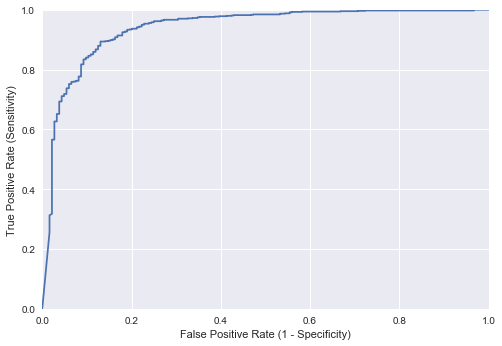

In [105]:
# plot ROC curve using y_test_binary and y_pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [106]:
# print the confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[126  58]
 [ 25 813]]


In [107]:
# calculate sensitivity
813 / float(813 + 25)

0.9701670644391408

In [108]:
# calculate specificity
126 / float(126 + 58)

0.6847826086956522

In [109]:
# first 10 false positives (meaning they were incorrectly classified as 5-star reviews)
X_test[y_test < y_pred_class][:10]

2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
8283    Don't know where I should start. Grand opening...
2765    Went last week, and ordered a dozen variety. I...
2839    Never Again,\nI brought my Mountain Bike in (w...
321     My wife and I live around the corner, hadn't e...
1919                                         D-scust-ing.
Name: text, dtype: object

In [110]:
# first 10 false negatives (meaning they were incorrectly classified as 1-star reviews)
X_test[y_test > y_pred_class][:10]

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
Name: text, dtype: object

## Comparing Multinomial and Gaussian Naive Bayes

scikit-learn documentation: [MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and [GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

Dataset: [Pima Indians Diabetes](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) from the UCI Machine Learning Repository

In [111]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [112]:
# notice that all features are continuous
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [113]:
# create X and y
X = pima.drop('label', axis=1)
y = pima.label

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [115]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.541666666667


In [116]:
# testing accuracy of Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class = gnb.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.791666666667
